In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import BTC Data

In [2]:
! pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 6.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
data = pd.DataFrame
data = yf.download(tickers='BTC-USD',start="2019-01-01", end="2022-01-01", interval = '1d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [4]:
train1 = data.iloc[:, 0:1]
train2 = data.iloc[:, 3:4]
train = train1.join([train2])
train.shape

(1097, 2)

In [5]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(train)
train = ms.transform(train)
train[:5]

array([[0.00538341, 0.00692016],
       [0.00698131, 0.00847686],
       [0.00825699, 0.00681452],
       [0.00671356, 0.00714142],
       [0.0070243 , 0.00694626]])

In [6]:
x_train = []
y_train = []
for i in range(14, len(train)):
  x_train.append(train[i-14:i])
  y_train.append(train[i])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((1083, 14, 2), (1083, 2))

# LSTM Model
this model predict BTC price by recent prices.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [8]:
# Create model
model = Sequential()
# Add LSTM layers and Dropouts
# First layers
model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(14, 2)))
model.add(Dropout(0.2))
# Seconde layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
# Third Layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
# Fourth layer
model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=240, activation='relu'))
model.add(Dropout(0.4))

In [9]:
# Output layer
model.add(Dense(units=2))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 60)            15120     
                                                                 
 dropout (Dropout)           (None, 14, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 80)            45120     
                                                                 
 dropout_1 (Dropout)         (None, 14, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 80)            51520     
                                                                 
 dropout_2 (Dropout)         (None, 14, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 14, 120)           9

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1028, epochs=100)

Epoch 1/100
2/2 [==============================] - 9s 132ms/step - loss: 0.1752
Epoch 2/100
2/2 [==============================] - 0s 128ms/step - loss: 0.1644
Epoch 3/100
2/2 [==============================] - 0s 131ms/step - loss: 0.1474
Epoch 4/100
2/2 [==============================] - 0s 135ms/step - loss: 0.1177
Epoch 5/100
2/2 [==============================] - 0s 137ms/step - loss: 0.0800
Epoch 6/100
2/2 [==============================] - 0s 151ms/step - loss: 0.0911
Epoch 7/100
2/2 [==============================] - 0s 157ms/step - loss: 0.0687
Epoch 8/100
2/2 [==============================] - 0s 153ms/step - loss: 0.0446
Epoch 9/100
2/2 [==============================] - 0s 163ms/step - loss: 0.0272
Epoch 10/100
2/2 [==============================] - 0s 144ms/step - loss: 0.0176
Epoch 11/100
2/2 [==============================] - 0s 137ms/step - loss: 0.0140
Epoch 12/100
2/2 [==============================] - 0s 135ms/step - loss: 0.0243
Epoch 13/100
2/2 [===================

In [13]:
test = pd.DataFrame
test = yf.download(tickers='BTC-USD',start="2022-01-01", end="2022-08-14", interval = '1d')
test.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [14]:
train1 = test.iloc[:, 0:1]
train4 = test.iloc[:, 3:4]
test = train1.join([train4])
test.shape

(226, 2)

In [15]:
# Scale test data
test = ms.transform(test)
test[:5]

array([[0.6689239 , 0.69018491],
       [0.69026785, 0.68486142],
       [0.68500844, 0.67103661],
       [0.67121711, 0.66230097],
       [0.66249526, 0.62601195]])

In [16]:
x_test = []
y_test = []
for i in range(14, len(test)):
  x_test.append(test[i-14:i])
  y_test.append(test[i])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((212, 14, 2), (212, 2))

In [17]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 2s 30ms/step - loss: 0.0034


0.0034286880400031805

In [18]:
prediction = model.predict(x_test)

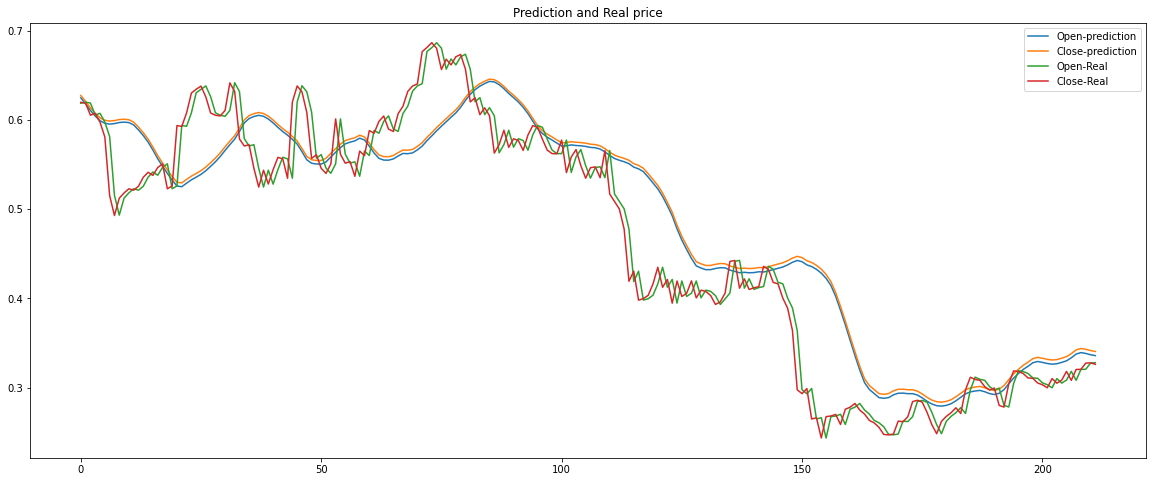

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8), dpi=72)
plt.title('Prediction and Real price')
plt.plot(prediction[:, 0], label='Open-prediction')
plt.plot(prediction[:, 1], label='Close-prediction')
plt.plot(y_test[:,0],label='Open-Real')
plt.plot(y_test[:,1], label='Close-Real')
plt.legend()